In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
train_generator = train_datagen.flow_from_directory(
        '../data/archive/train/mouth',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        # Since we use binary_crossentropy loss, we need binary labels
        shuffle=True,
        class_mode='binary',
        batch_size=16)

validation_generator = train_datagen.flow_from_directory(
        '../data/archive/val/mouth',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        # Since we use binary_crossentropy loss, we need binary labels
        shuffle=True,
        class_mode='binary',
        batch_size=16)

Found 1069 images belonging to 2 classes.
Found 379 images belonging to 2 classes.


In [5]:
base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(
    include_top=False, weights='imagenet', input_shape=(224,224,3)
)

In [6]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 2,225,153
Non-trainable params: 34,112
_________________________________________________________________


In [8]:
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [9]:
#early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)

history = model.fit(
      train_generator,
      validation_data = validation_generator,
      epochs=16,
      verbose=1,
      #callbacks=early_stop
      )

Epoch 1/16
67/67 [==============================] - 42s 344ms/step - loss: 0.3092 - accuracy: 0.8904 - val_loss: 27.1309 - val_accuracy: 0.4802
Epoch 2/16
67/67 [==============================] - 13s 188ms/step - loss: 0.0125 - accuracy: 0.9973 - val_loss: 37.0612 - val_accuracy: 0.4802
Epoch 3/16
67/67 [==============================] - 13s 193ms/step - loss: 0.0780 - accuracy: 0.9868 - val_loss: 21.7856 - val_accuracy: 0.4802
Epoch 4/16
67/67 [==============================] - 13s 196ms/step - loss: 0.0275 - accuracy: 0.9894 - val_loss: 20.2263 - val_accuracy: 0.4802
Epoch 5/16
67/67 [==============================] - 13s 194ms/step - loss: 0.0289 - accuracy: 0.9903 - val_loss: 11.1644 - val_accuracy: 0.4802
Epoch 6/16
67/67 [==============================] - 13s 195ms/step - loss: 0.0175 - accuracy: 0.9943 - val_loss: 21.7805 - val_accuracy: 0.4802
Epoch 7/16
67/67 [==============================] - 13s 196ms/step - loss: 0.0338 - accuracy: 0.9924 - val_loss: 20.1505 - val_accuracy:

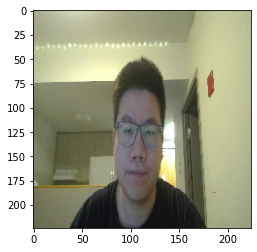

[[0.999982]]
../data/test/mouth/WIN_20221130_12_27_58_Pro.jpg: is yawning


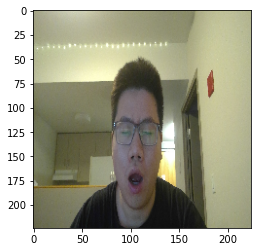

[[0.9999999]]
../data/test/mouth/WIN_20221130_12_28_05_Pro.jpg: is yawning


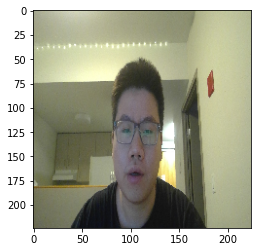

[[0.999658]]
../data/test/mouth/WIN_20221130_12_28_10_Pro.jpg: is yawning


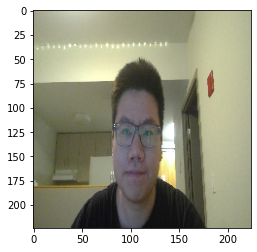

[[0.9997874]]
../data/test/mouth/WIN_20221130_12_28_12_Pro.jpg: is yawning


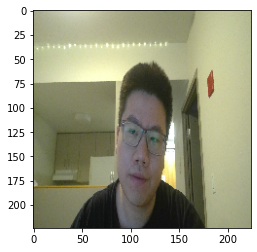

[[0.9998247]]
../data/test/mouth/WIN_20221130_12_28_14_Pro.jpg: is yawning


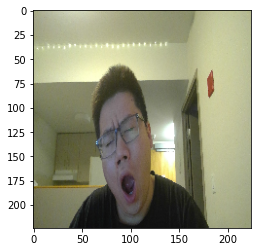

[[0.9999999]]
../data/test/mouth/WIN_20221130_12_28_17_Pro.jpg: is yawning


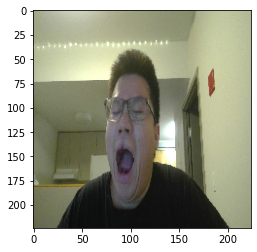

[[0.9999999]]
../data/test/mouth/WIN_20221130_12_35_32_Pro.jpg: is yawning


In [10]:
# predicting images
for im in os.listdir("../data/test/mouth"):
    path = "../data/test/mouth/" + im
    img = image.load_img(path, target_size=(224, 224, 3))
    x = image.img_to_array(img)
    x = x/255.0
    plt.imshow(x)
    plt.show()
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict(images)
    print(classes)
    if classes[0]>0.5:
        print(path+ ": is yawning")
    else:
        print(path+ " is not yawning")

In [51]:
model.save("mobilenet_Dense__yawning_model.h5")

In [3]:
reconstructed_model = keras.models.load_model("mobilenet_yawning_model.h5")

In [4]:
test_generator = train_datagen.flow_from_directory(
        '../data/test/mouth',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        # Since we use binary_crossentropy loss, we need binary labels
        shuffle=True,
        class_mode='binary',
        batch_size=16)

Found 62 images belonging to 2 classes.


In [5]:
reconstructed_model.evaluate(test_generator)

4/4 [==============================] - 9s 683ms/step - loss: 0.8581 - accuracy: 0.8387


[0.8581174612045288, 0.8387096524238586]

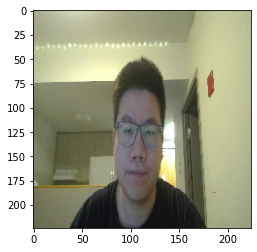

[[0.11954875]]
../data/test/mouth/WIN_20221130_12_27_58_Pro.jpg is not yawning


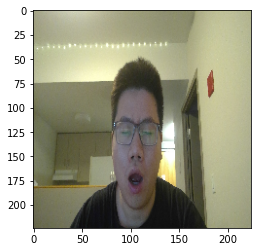

[[0.78152895]]
../data/test/mouth/WIN_20221130_12_28_05_Pro.jpg: is yawning


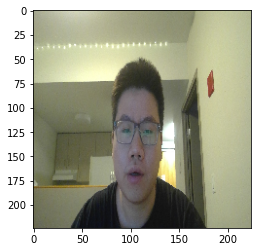

[[0.3937083]]
../data/test/mouth/WIN_20221130_12_28_10_Pro.jpg is not yawning


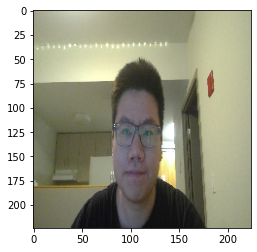

[[0.10556559]]
../data/test/mouth/WIN_20221130_12_28_12_Pro.jpg is not yawning


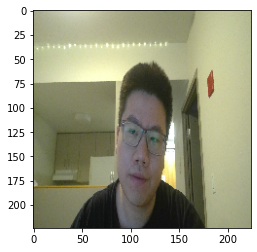

[[0.13775066]]
../data/test/mouth/WIN_20221130_12_28_14_Pro.jpg is not yawning


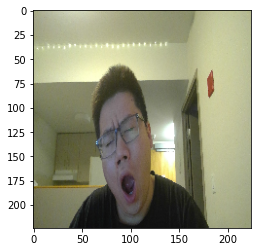

[[0.57829857]]
../data/test/mouth/WIN_20221130_12_28_17_Pro.jpg: is yawning


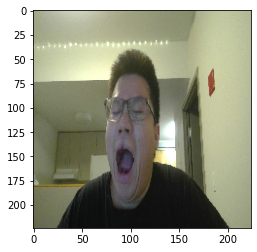

[[0.63521224]]
../data/test/mouth/WIN_20221130_12_35_32_Pro.jpg: is yawning


In [9]:
# predicting images
for im in os.listdir("../data/test/mouth"):
    path = "../data/test/mouth/" + im
    img = image.load_img(path, target_size=(224, 224, 3))
    x = image.img_to_array(img)
    x = x/255.0
    plt.imshow(x)
    plt.show()
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = reconstructed_model.predict(images)
    print(classes)
    if classes[0]>0.5:
        print(path+ ": is yawning")
    else:
        print(path+ " is not yawning")